### Project Overview
- Your goal is to find the top 20 companies in the Nasdaq that made up the upper end, in terms of weight, of the entire index 10 years prior to covid ( 1-1-2020)
 - What was the max possible return for the 20 companies in a portfolio over a 10 year span
 - How did these companies perform during covid if they were weighed the same prior to covid assuming a position of 150K. 
 - What would be the return year to date

#### Project Approach
- Download 20 years of data for every company in the index- from 2010-1-1 - 1-1-2020
- Optimize the portfolio containing every company to find the max possible return. 
- Find the top 20 companies by weight 
- Put these companies in a portfolio and find what they would have produced as a portfolio over the 10 year span

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from pandas_datareader import data as web

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
nasdaq_100 =pd.read_excel("resources/nasdaq_100_stocks.xlsx")

In [4]:
nasdaq_100

,Ticker,Name,Price,Dividend Yield,Market Cap ($M),Forward P/E Ratio,Payout Ratio,Beta
0,AAL,"American Airlines Group, Inc.",9.725,0.040445,4.182432e+03,-5.22,-0.215088,1.320897
1,AAPL,"Apple, Inc.",318.700,0.009721,1.373336e+06,24.79,0.239474,1.138869
2,ADBE,"Adobe, Inc.",385.340,NaN,1.841299e+05,57.74,NaN,1.126455
3,ADI,"Analog Devices, Inc.",111.050,0.020178,4.089886e+04,36.87,0.743741,1.284610
4,ADP,"Automatic Data Processing, Inc.",134.920,0.025503,5.729747e+04,23.00,0.579700,1.169959
...,...,...,...,...,...,...,...,...
98,WDC,Western Digital Corp.,42.410,0.046849,1.279424e+04,-21.08,-0.993986,1.571671
99,WLTW,Willis Towers Watson Plc,198.480,0.013139,2.576780e+04,24.20,0.320665,0.920020
100,WYNN,Wynn Resorts Ltd.,78.260,0.048106,8.969224e+03,-21.72,-1.110063,1.585177
101,XEL,"Xcel Energy, Inc.",60.395,0.027348,3.158049e+04,23.29,0.634547,0.886043


In [5]:
tickers = list(nasdaq_100["Ticker"].values)

In [6]:
data = pd.DataFrame()

### Fetching Adj Close prior to Covid-19
 - beginning of 2010 to jan 2020

In [7]:
failed = []
passed = []
for x in tickers:
    try:
        data[x] = web.DataReader(x, data_source= "yahoo", start = "2010-1-1",end = "2020-1-1")["Adj Close"]
        passed.append(x)
    except (IOError, KeyError):
        msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        failed.append(x)

In [8]:
failed

['CELG', 'CTRP', 'SYMC']

In [9]:
len(passed)

100

# Portfolio Daily Returns

In [10]:
port_daily_returns = data.pct_change()

In [11]:
port_daily_returns

,AAL,AAPL,ADBE,ADI,ADP,ADSK,ALGN,ALXN,AMAT,AMD,...,VRSK,VRSN,VRTX,WBA,WDAY,WDC,WLTW,WYNN,XEL,XLNX
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.113208,0.001729,0.016446,-0.001579,-0.005370,-0.015193,-0.026486,-0.014300,-0.007693,0.001031,...,0.006700,0.010509,-0.033002,-0.008043,NaN,0.026513,-0.002241,0.060819,-0.011860,-0.012608
2010-01-06,-0.041431,-0.015906,-0.002122,-0.001898,-0.002347,0.002373,-0.029428,0.002523,-0.002114,-0.014418,...,0.012978,-0.010800,-0.017532,-0.007568,NaN,0.000861,0.016099,-0.013117,0.001920,-0.006784
2010-01-07,0.029469,-0.001849,-0.019405,-0.007921,-0.000471,0.005525,-0.002860,0.003775,-0.010593,-0.010449,...,-0.001643,-0.013748,-0.012610,0.005992,NaN,-0.019570,-0.002948,0.021356,-0.004313,-0.010044
2010-01-08,-0.019084,0.006648,-0.005422,0.005749,-0.001413,0.030612,0.013196,0.001880,0.038544,-0.004224,...,-0.012833,0.007790,-0.020000,0.001353,NaN,0.005045,-0.001108,-0.007164,0.000481,0.014611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,-0.004096,0.000951,0.002098,0.004615,-0.000647,0.005412,-0.000899,-0.001630,0.006876,0.023757,...,-0.002541,0.001663,0.002637,-0.003756,0.003502,-0.007496,0.002034,-0.005634,0.003913,-0.004146
2019-12-26,0.016792,0.019840,0.004732,0.000084,0.002590,0.001794,0.001331,-0.012242,-0.003089,0.001934,...,-0.002279,0.004981,-0.001406,0.009426,-0.004994,0.009160,0.000148,0.010757,-0.001114,0.001929
2019-12-27,-0.041456,-0.000380,-0.001238,-0.002339,0.002466,0.006188,-0.002228,-0.003488,-0.002284,-0.009650,...,-0.001680,0.001755,0.003269,0.002037,0.002963,-0.010669,-0.001287,-0.008018,0.005256,-0.002635


### Vol 10 year span
- Top 20 most Volatile companies in the last 10 years

In [12]:
nasdaq_10_year_vol = pd.DataFrame([port_daily_returns[x].std() * np.sqrt(252) for x in port_daily_returns], columns=["Vol"])

In [13]:
nasdaq_10_year_vol["Ticker"] = nasdaq_100["Ticker"]

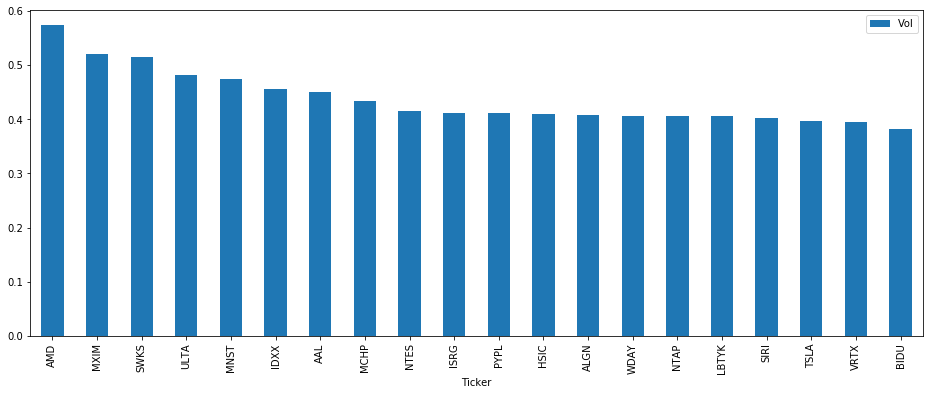

In [14]:
nasdaq_10_year_vol.set_index("Ticker").sort_values("Vol", ascending = False).head(20).plot(kind = "bar", figsize = (16,6))

### Random Weights
- We will put every stock into a portfolio nd apttemt to optimize it. The top 20 companies at the top by weight will bve used for  a portfolio 

In [15]:
number_of_ports = 4000
all_weights = np.zeros((number_of_ports, len(port_daily_returns.columns)))
all_vol = np.zeros(number_of_ports)
all_returns = np.zeros(number_of_ports)
all_sharps = np.zeros(number_of_ports)

for ind in range(number_of_ports):
    weights = np.random.random(len(port_daily_returns.columns))
    weights = weights/weights.sum()
    all_weights[ind,:] = weights
    
    all_returns[ind] = np.sum(port_daily_returns.mean() *weights) * 252 
    all_vol[ind] = np.sqrt(np.dot(weights.T, np.dot(port_daily_returns.cov() * 252, weights)))
    all_sharps[ind] = all_returns[ind]/all_vol[ind]

In [16]:
max_sharp = all_sharps.argmax()

In [17]:
max_return = all_returns.argmax()

In [18]:
lowest_vol = all_vol.argmin()

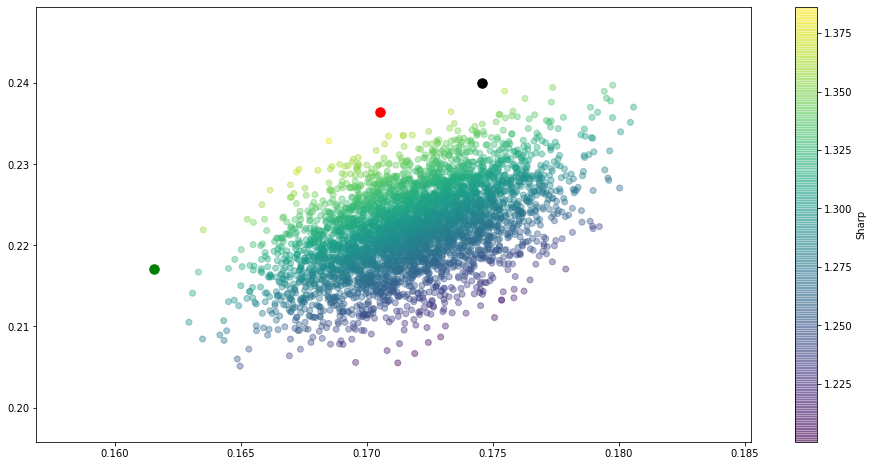

In [19]:
plt.figure(figsize=(16,8))
plt.scatter(all_vol, all_returns,c =all_sharps, alpha = 0.4)
plt.colorbar(label = "Sharp")
plt.scatter(all_vol[max_sharp], all_returns[max_sharp], c = "r", s = 90)
plt.scatter(all_vol[max_return], all_returns[max_return], c = "black", s = 90)
plt.scatter(all_vol[lowest_vol], all_returns[lowest_vol], c = "green", s = 90)


## Putting it all together
- Will create a data frame for the returns, vol, sharp and weights 

In [20]:
nasdaq = pd.DataFrame(all_returns, columns=["Returns"])

In [21]:
nasdaq["vol"] = all_vol

In [22]:
nasdaq["sharp"] = all_sharps

In [23]:
weights_df = pd.DataFrame(all_weights, columns=port_daily_returns.columns)

In [24]:
nasdaq = pd.concat([nasdaq, weights_df], axis=1)

### MAx Return Portfolio -Leaders
- The top 20 companies in terms pof weight are below
- Again this is if we mae the entire nasdaq a portfolio 
- These wouldb e the top 20 weighted companies producing the best returns relative to vol

In [25]:
nasdaq[nasdaq["Returns"] == nasdaq["Returns"][max_return]]

,Returns,vol,sharp,AAL,AAPL,ADBE,ADI,ADP,ADSK,ALGN,...,VRSK,VRSN,VRTX,WBA,WDAY,WDC,WLTW,WYNN,XEL,XLNX
965,0.240063,0.174569,1.375177,0.008287,0.008829,0.009868,0.003897,0.018481,0.005584,0.019768,...,0.004144,0.018814,0.007428,0.013218,0.017019,0.004787,0.01123,0.003078,0.006126,0.001348


In [27]:
top_20_weighted = nasdaq[nasdaq["Returns"] == nasdaq["Returns"][max_return]].transpose().drop(["sharp", "Returns", "vol"]).sort_values(965,
                                                                    ascending = False).head(20)

In [28]:
top_20_weighted

,965
MNST,0.019905
LULU,0.019809
ALGN,0.019768
INTC,0.019694
MELI,0.019339
TXN,0.019234
AVGO,0.019058
NFLX,0.018981
VRSN,0.018814
ADP,0.018481


In [29]:
top20_tickers = list(top_20_weighted.index)

### Analysis - Max Return
 - We will take the 20 companies that provided that made up the nasdaq at the end of the 10 year period and put them into a portfolio
 - We will calculate the the max return, vol, and sharp for this portfolio

In [30]:
top_20 = pd.DataFrame()

In [31]:
for t in top20_tickers:
    top_20[t] = web.DataReader(t,data_source="yahoo", start = "2010-1-1")["Adj Close"]

In [32]:
top_20

,MNST,LULU,ALGN,INTC,MELI,TXN,AVGO,NFLX,VRSN,ADP,CHTR,PYPL,WDAY,ISRG,NXPI,INCY,REGN,GOOGL,BIIB,BMRN
Date,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.546667,15.455000,18.500000,15.165774,49.021591,19.885359,15.398523,7.640000,21.007998,28.891720,NaN,NaN,NaN,102.923332,NaN,9.500000,24.629999,313.688690,53.639999,18.950001
2010-01-05,6.571667,15.915000,18.010000,15.158516,50.271599,19.770679,15.512832,7.358572,21.228777,28.736578,35.000000,NaN,NaN,102.459999,NaN,10.270000,25.100000,312.307312,53.380001,19.150000
2010-01-06,6.708333,16.250000,17.480000,15.107669,49.680511,19.625423,15.635304,7.617143,20.999506,28.669119,35.000000,NaN,NaN,103.946663,NaN,11.000000,24.719999,304.434448,53.430000,19.180000
2010-01-07,6.681667,16.155001,17.430000,14.962406,48.701828,19.686581,15.537333,7.485714,20.710794,28.655622,35.000000,NaN,NaN,103.556664,NaN,10.820000,24.570000,297.347351,52.990002,20.260000
2010-01-08,6.715000,16.135000,17.660000,15.129463,48.944077,20.137650,15.651633,7.614286,20.872135,28.615145,33.500000,NaN,NaN,102.986664,NaN,10.940000,24.370001,301.311310,54.080002,20.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-08,70.400002,315.299988,289.750000,63.669998,858.859985,132.860001,317.519989,419.489990,214.449997,160.210190,540.359985,156.089996,181.229996,592.700012,113.682434,94.580002,604.039978,1448.040039,301.260010,106.870003
2020-06-09,70.430000,316.399994,279.709991,63.040001,866.429993,132.119995,315.320007,434.049988,213.429993,156.770386,531.570007,156.860001,179.759995,584.520020,111.101921,93.000000,608.590027,1452.079956,293.739990,105.089996
2020-06-10,70.440002,323.250000,267.559998,63.869999,886.780029,131.399994,315.040009,434.480011,213.149994,155.129990,533.809998,159.910004,183.050003,585.380005,109.886383,93.040001,606.590027,1464.699951,295.250000,107.660004


In [33]:
top_20_returns = top_20.pct_change()

In [34]:
top_20_returns

,MNST,LULU,ALGN,INTC,MELI,TXN,AVGO,NFLX,VRSN,ADP,CHTR,PYPL,WDAY,ISRG,NXPI,INCY,REGN,GOOGL,BIIB,BMRN
Date,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.003819,0.029764,-0.026486,-0.000479,0.025499,-0.005767,0.007423,-0.036836,0.010509,-0.005370,NaN,NaN,NaN,-0.004502,NaN,0.081053,0.019082,-0.004404,-0.004847,0.010554
2010-01-06,0.020796,0.021049,-0.029428,-0.003354,-0.011758,-0.007347,0.007895,0.035139,-0.010800,-0.002347,0.000000,NaN,NaN,0.014510,NaN,0.071081,-0.015139,-0.025209,0.000937,0.001567
2010-01-07,-0.003975,-0.005846,-0.002860,-0.009615,-0.019700,0.003116,-0.006266,-0.017254,-0.013748,-0.000471,0.000000,NaN,NaN,-0.003752,NaN,-0.016364,-0.006068,-0.023280,-0.008235,0.056309
2010-01-08,0.004989,-0.001238,0.013196,0.011165,0.004974,0.022913,0.007356,0.017176,0.007790,-0.001413,-0.042857,NaN,NaN,-0.005504,NaN,0.011091,-0.008140,0.013331,0.020570,-0.000494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-08,-0.025336,-0.014010,0.005343,-0.010413,-0.009309,0.010803,0.001388,-0.000262,0.015004,0.006370,0.018164,0.000577,0.014328,-0.000101,0.002460,0.011443,0.011792,0.005569,-0.017801,0.010113
2020-06-09,0.000426,0.003489,-0.034651,-0.009895,0.008814,-0.005570,-0.006929,0.034709,-0.004756,-0.021471,-0.016267,0.004933,-0.008111,-0.013801,-0.022699,-0.016705,0.007533,0.002790,-0.024962,-0.016656
2020-06-10,0.000142,0.021650,-0.043438,0.013166,0.023487,-0.005450,-0.000888,0.000991,-0.001312,-0.010464,0.004214,0.019444,0.018302,0.001471,-0.010941,0.000430,-0.003286,0.008691,0.005141,0.024455


In [35]:
number_of_portfolios = 3000
all_weights = np.zeros((number_of_portfolios, len(top20_tickers)))
all_returns = np.zeros(number_of_portfolios)
all_vol = np.zeros(number_of_portfolios)
all_sharps = np.zeros(number_of_portfolios)

for ind in range(number_of_portfolios):
    weights = np.random.random(len(top20_tickers))
    weights = weights/weights.sum()
    all_weights[ind:,] = weights
    
    all_returns[ind] = np.sum(top_20_returns.mean() * weights) * 252
    all_vol[ind] = np.sqrt(np.dot(weights.T, np.dot(top_20_returns.cov() * 252, weights)))
    all_sharps[ind] = all_returns[ind]/all_vol[ind]

In [36]:
max_return = all_returns.argmax()

In [37]:
max_sharp = all_sharps.argmax()

In [38]:
low_vol = all_vol.argmin()

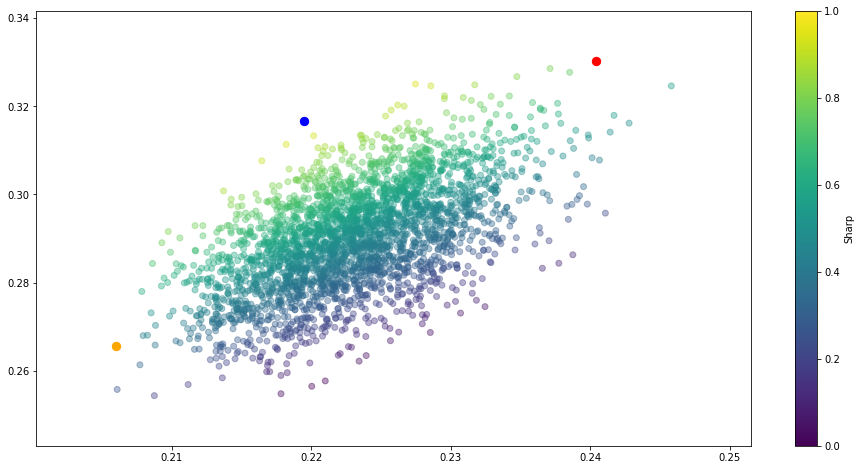

In [39]:
plt.figure(figsize=(16,8))
plt.scatter(all_vol,all_returns, c= all_sharps,cmap="viridis", alpha = 0.4, label = "data")
plt.scatter(all_vol[max_return],all_returns[max_return], c = "red", s = 70, label = "Max return")
plt.scatter(all_vol[max_sharp],all_returns[max_sharp], c = "blue", s = 70, label = "Max Sharp")
plt.scatter(all_vol[low_vol],all_returns[low_vol], c = "orange", s = 70, label = "Lowest Vol")
plt.colorbar(label = "Sharp");

In [40]:
max_p = pd.DataFrame(all_sharps, columns=["sharp"])

In [41]:
max_p["returns"] = all_returns

In [42]:
max_p["vol"] = all_vol

In [43]:
top_20_weights = pd.DataFrame(all_weights, columns=top_20_returns.columns)

In [44]:
max_p = pd.concat([max_p, top_20_weights], axis=1)

In [45]:
max_p.to_csv("resources/max_return_portfolio.csv")

In [46]:
max_p[max_p["returns"] == max_p["returns"][max_return]]

,sharp,returns,vol,MNST,LULU,ALGN,INTC,MELI,TXN,AVGO,...,CHTR,PYPL,WDAY,ISRG,NXPI,INCY,REGN,GOOGL,BIIB,BMRN
21,1.373773,0.330251,0.240397,0.021521,0.082626,0.097573,0.011757,0.104542,0.036523,0.097478,...,0.040464,0.003789,0.0492,0.051687,0.044394,0.077207,0.055541,0.027038,0.0256,0.035341


### Scipy Calculation
- We will use to use this for validate and improve the portfolio above

In [47]:
from scipy.optimize import minimize

In [48]:
def get_Shrpp(weights):
    weights = np.array(weights)
    ret = np.sum(top_20_returns.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(top_20_returns.cov() *252, weights)))
    shp = ret/vol
    return np.array([ret,vol,shp])

In [49]:
def check_weights(weights):
    return np.sum(weights) - 1

In [50]:
def reduce_shp(weights):
    return get_Shrpp(weights)[2] * -1

In [51]:
cons = {"type":"eq", "fun": check_weights}

In [54]:
bou = ((0,1),) * len(top20_tickers)

In [55]:
initial_guess = [0.05] * len(top20_tickers)

In [56]:
best_case = minimize(reduce_shp,initial_guess, method="SLSQP",constraints=cons)

In [57]:
best_case

     fun: -1.6786098003854661
     jac: array([-5.08829951e-04,  1.04717910e-03,  5.71951270e-04, -2.91600823e-04,
       -8.04781914e-04, -4.72217798e-05, -4.27067280e-05,  1.21936202e-04,
        3.95655632e-04, -2.54958868e-05, -3.34024429e-04, -2.04011798e-04,
        1.16273761e-04,  8.96155834e-05, -4.26173210e-05, -7.61747360e-05,
       -2.44513154e-04, -2.38388777e-04, -2.76818871e-04, -2.07617879e-04])
 message: 'Optimization terminated successfully.'
    nfev: 310
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([ 0.19090216,  0.14062422,  0.08450301, -0.22193964,  0.05933203,
       -0.12612621,  0.20979571,  0.21823777,  0.12869862, -0.15283594,
        0.39954543,  0.28166574, -0.10332838, -0.06058896,  0.00379767,
        0.03429865,  0.20681779, -0.23624273,  0.02942223, -0.08657918])

In [58]:
get_Shrpp(best_case.x)

array([0.50147741, 0.29874567, 1.6786098 ])

## Efficient Frontier

In [59]:
front_y = np.linspace(0.23, 0.34, 200)

In [60]:
front_x = []

In [61]:
def red_vol(weights):
    return get_Shrpp(weights)[1]

In [62]:
frontier_weights = []

In [63]:
for pos_return in front_y:
    con = ({"type":"eq", "fun": check_weights}, {"type":"eq", "fun": lambda w: get_Shrpp(w)[0] - pos_return})
    result = minimize(red_vol, initial_guess, method="SLSQP", bounds=bou, constraints=con)
    front_x.append(result["fun"])
    frontier_weights.append(result.x)

In [64]:
result

     fun: 0.21495253804781905
     jac: array([0.18482452, 0.2308792 , 0.21752817, 0.15408438, 0.23374531,
       0.16682128, 0.22029493, 0.30363357, 0.17150198, 0.13726862,
       0.19455975, 0.22888386, 0.19729194, 0.15807603, 0.22333715,
       0.20620518, 0.23973142, 0.14957814, 0.15576825, 0.18279221])
 message: 'Optimization terminated successfully.'
    nfev: 198
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([1.37884211e-01, 7.85773215e-02, 2.83523215e-02, 0.00000000e+00,
       6.33356765e-03, 0.00000000e+00, 7.80112915e-02, 1.29540810e-01,
       1.21605942e-01, 0.00000000e+00, 2.92715006e-01, 0.00000000e+00,
       3.67781706e-18, 0.00000000e+00, 1.32899469e-17, 3.48808168e-18,
       1.14030848e-01, 1.40929342e-17, 1.29486802e-02, 0.00000000e+00])

In [65]:
frontier_df = pd.DataFrame(front_y, columns=["returns"])

In [66]:
frontier_df["vol"] = front_x

In [69]:
frontier_weights_df = pd.DataFrame(frontier_weights, columns = top20_tickers)

In [70]:
frontier_df = pd.concat([frontier_df, frontier_weights_df], axis=1)

In [71]:
frontier_df

,returns,vol,MNST,LULU,ALGN,INTC,MELI,TXN,AVGO,NFLX,...,CHTR,PYPL,WDAY,ISRG,NXPI,INCY,REGN,GOOGL,BIIB,BMRN
0,0.230000,0.186244,0.091185,0.000842,0.000000e+00,4.737769e-02,0.000000e+00,9.867548e-03,2.087089e-18,0.013138,...,0.183855,6.157591e-17,8.504211e-18,3.313708e-02,2.936155e-17,7.413232e-18,0.013628,1.313830e-01,0.064249,3.346631e-03
1,0.230553,0.186246,0.091503,0.001306,0.000000e+00,4.676574e-02,0.000000e+00,9.960040e-03,0.000000e+00,0.013798,...,0.184488,7.446436e-17,3.095397e-17,3.299960e-02,1.909551e-17,2.493665e-18,0.014194,1.304941e-01,0.064122,3.168431e-03
2,0.231106,0.186250,0.091822,0.001763,2.534323e-18,4.615250e-02,9.581637e-18,1.004774e-02,0.000000e+00,0.014460,...,0.185122,1.319339e-17,1.072005e-17,3.286162e-02,0.000000e+00,4.397795e-18,0.014765,1.296099e-01,0.063992,2.990381e-03
3,0.231658,0.186256,0.092141,0.002219,3.740497e-18,4.553821e-02,0.000000e+00,1.013436e-02,0.000000e+00,0.015122,...,0.185755,3.417270e-17,7.752046e-18,3.272314e-02,1.496199e-17,1.016440e-19,0.015336,1.287271e-01,0.063863,2.812765e-03
4,0.232211,0.186263,0.092460,0.002675,2.423869e-17,4.492350e-02,8.138293e-18,1.021566e-02,0.000000e+00,0.015782,...,0.186390,0.000000e+00,1.205497e-17,3.258498e-02,2.568204e-18,0.000000e+00,0.015910,1.278490e-01,0.063729,2.634668e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.337789,0.213867,0.139445,0.077454,2.641006e-02,1.065229e-17,4.533371e-03,0.000000e+00,7.638605e-02,0.126170,...,0.291647,1.070650e-17,3.577867e-18,3.144186e-18,7.860466e-19,0.000000e+00,0.110564,0.000000e+00,0.017567,0.000000e+00
196,0.338342,0.214135,0.138661,0.077828,2.693825e-02,1.029992e-18,5.121893e-03,1.219727e-17,7.659007e-02,0.127038,...,0.292146,5.190618e-18,2.310706e-17,0.000000e+00,0.000000e+00,2.846031e-19,0.111396,0.000000e+00,0.016844,0.000000e+00
197,0.338894,0.214405,0.138657,0.078116,2.723885e-02,0.000000e+00,5.421026e-03,1.778092e-17,7.713655e-02,0.127962,...,0.291932,0.000000e+00,6.315478e-18,3.388132e-18,6.694948e-18,1.029992e-18,0.112286,0.000000e+00,0.015453,0.000000e+00
198,0.339447,0.214677,0.138379,0.078403,2.762997e-02,0.000000e+00,5.808073e-03,4.933120e-18,7.758240e-02,0.128858,...,0.291933,7.453890e-19,0.000000e+00,3.049319e-18,3.984443e-18,6.911789e-19,0.113166,0.000000e+00,0.014159,3.103529e-18


In [72]:
frontier_df[frontier_df["returns"] == frontier_df["returns"].max()]

,returns,vol,MNST,LULU,ALGN,INTC,MELI,TXN,AVGO,NFLX,...,CHTR,PYPL,WDAY,ISRG,NXPI,INCY,REGN,GOOGL,BIIB,BMRN
199,0.34,0.214953,0.137884,0.078577,0.028352,0.0,0.006334,0.0,0.078011,0.129541,...,0.292715,0.0,3.677817e-18,0.0,1.328995e-17,3.488082e-18,0.114031,1.409293e-17,0.012949,0.0


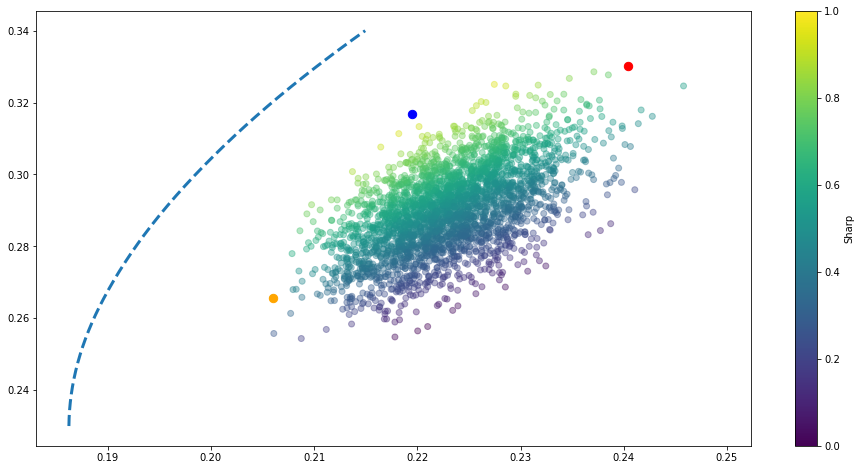

In [73]:
plt.figure(figsize=(16,8))
plt.scatter(all_vol,all_returns, c= all_sharps,cmap="viridis", alpha = 0.4, label = "data")
plt.scatter(all_vol[max_return],all_returns[max_return], c = "red", s = 70, label = "Max return")
plt.scatter(all_vol[max_sharp],all_returns[max_sharp], c = "blue", s = 70, label = "Max Sharp")
plt.scatter(all_vol[low_vol],all_returns[low_vol], c = "orange", s = 70, label = "Lowest Vol")
plt.plot(frontier_df["vol"], frontier_df["returns"], ls = "--", lw = "3")
plt.colorbar(label = "Sharp");